# Sieving for Primes

A common task in number theory problems is to find all the primes up to a number $n$. [Project Euler](https://projecteuler.net/) is a great resource for problems like this. A simple method of finding primes, the [Sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes), was known in Ancient Greece. You start with 2 and discard as non-prime all multiples of 2 up to $n$. You then move onto the next number you haven't discarded, 3, and mark as non-prime all multiples of 3 up to $n$. We've discarded 4, so we move on to 5 and continue. We can stop when we get to $\sqrt n$ as we'll have discarded all the multiples by then.

Here's what the algorithm looks like for $n = 400$.

[ SIEVE OF ERATOSTHENES VIZ ]

The numbers remaining in red at the end are determined to be prime.

See this example at [bl.ocks.org](http://bl.ocks.org/tommyogden/e63a893e60ba0c96badbb98050a2dedc)

When should we use the Sieve of Eratosthenes? In this notebook I'll compare it to a naive iterative search by writing example algorithms in Python.

## Solution A: Iterative Search

Our first approach is to iteratively build a list of primes up to a limit $n$.

When checking a number $i$ for primality, we only need to check prime factors, so we can check the list as we're building it. Also, in checking if a number $i$ is prime, we only need to check for factors up to $\sqrt{i}$.

We'll write a method that appends the next prime to an existing list of primes.

In [1]:
def primes_next(primes):
    """Take an ordered list of prime numbers and append the next 
        prime.
        
    Args:
        primes: list of ordered primes, with the last prime odd,
         e.g. [2,3].
         
    Returns:
        The list primes with the next prime appended,
         e.g. [2,3,5].
    """
    
    i = primes[-1]
    while True:
        i += 2
        for p in primes:
            if p**2 > i: # No factors found, i prime
                primes.append(i)
                return primes
            if i%p == 0: # Factor found, try next i
                break

So for example, if we have the list `[2, 3, 5]` we expect to return `[2, 3, 5, 7]`.

In [2]:
print(primes_next([2, 3, 5]))

[2, 3, 5, 7]


Now we repeat this until we get to $n$.

In [3]:
def primes_iterative(n):
    """ Build a list of the primes up to n iteratively. """
    
    p = [2,3]
    while p[-1] <= n:
        primes_next(p)
    p.pop() # Discard the last one.
    return p

In [4]:
print(primes_iterative(n=20))

[2, 3, 5, 7, 11, 13, 17, 19]


We'll compare the methods later by counting the number of primes up to $n$ each returns.

In [5]:
def sol_a(n):
    """ Count the number of primes up to n iteratively."""
    return len(primes_iterative(n))

In [6]:
print("The number of primes up to 1000 is {0}.".format(sol_a(n=1000)))

The number of primes up to 1000 is 168.


## Solution B: Sieve of Eratosthenes

For the Sieve of Eratosthenes algorithm, we'll use some helper functions. First we want a method to sieve out the multiples of a factor $f$.

In [7]:
def sieve_multiples(A, f):
    """Set the primality of multiples of f to False.
    
    Args:
        A: List of booleans representing primality of each index.
        f: Factor to find multiples of.
        
    Notes:
        - A is indexed such that A[0] represents 1, A[1] represents 2, etc.
        - Only sieves factors greater than f^2.
    """
    
    for i in range(f**2-1, len(A), f):
        A[i] = False

Note that we only need to sieve for factors greater than $f^2$, as the smaller multiples will already have been discarded.

In [8]:
A = [True]*10
print(A)
sieve_multiples(A, 2)
sieve_multiples(A, 3)
sieve_multiples(A, 5)
print(A)

[True, True, True, True, True, True, True, True, True, True]
[True, True, True, False, True, False, True, False, False, False]


Next a couple of simple helper methods. One to get us the next `True` value in a boolean list.

In [9]:
def next_factor(A, start=0):
    """Returns the next True index in A, after start."""
    return next((i for i, a in enumerate(A[start:], start=start) if a), None)

Another to return all the indexes of all remaining `True` values, shifted by 1. Once we've performed the sieve, this will represent the reminaing primes.

In [10]:
def remaining(A):
    """Returns the indexes of all remaining True values, shifted by 1."""
    return [i+1 for i, a in enumerate(A) if a]

Now we're ready to perform the sieve.

In [11]:
def primes_eratosthenes(n):
    """ Build a list of the primes below n by the Sieve of Eratosthenes. """
    
    A = [True]*n
    A[0] = False # 1 is not prime
    
    primes = []
    p = 1 # 2 is prime
    
    while p**2 < n: # Only need to check up to sqrt(n)
        A[p] = False
        primes.append(p+1)
        sieve_multiples(A, p+1)
        p = next_factor(A, p)
    
    primes.extend(remaining(A)) # All remaining must be prime.
    
    return primes

In [12]:
print(primes_eratosthenes(n=20))

[2, 3, 5, 7, 11, 13, 17, 19]


Again we'll write a count method to compare.

In [13]:
def sol_b(n):
    """ Count the number of primes up to n by the Sieve of Eratosthenes. """
    return len(primes_eratosthenes(n))

In [14]:
print("The number of primes up to 1000 is {0}.".format(sol_b(n=1000)))

The number of primes up to 1000 is 168.


## Compare Counts

To check the result of the methods against each other, we'll try a few values of $n$. The methods could both be wrong of course.

In [15]:
N = [5, 10, 17, 20, 50, 100, 1000, 10000, 100000, 1000000]

for i, n in enumerate(N):
    assert(sol_a(n) == sol_b(n))

## Complexity Analysis

Finally, we'll compare timings by solving the problem over a range of $n$ values.

In [16]:
N = [10, 20, 50, 100, 1000, 10000, 100000, 1000000, 10000000]

sol_times_a = [0.0]*len(N)
sol_times_b = [0.0]*len(N)

for i, n in enumerate(N):
    result = %timeit -o sol_a(n)
    sol_times_a[i] = result.best
    
    result = %timeit -o sol_b(n)
    sol_times_b[i] = result.best

100000 loops, best of 3: 5.73 µs per loop
100000 loops, best of 3: 9.67 µs per loop
100000 loops, best of 3: 14.4 µs per loop
100000 loops, best of 3: 14.4 µs per loop
10000 loops, best of 3: 39.3 µs per loop
10000 loops, best of 3: 20.8 µs per loop
10000 loops, best of 3: 79.8 µs per loop
10000 loops, best of 3: 26.9 µs per loop
1000 loops, best of 3: 1.18 ms per loop
1000 loops, best of 3: 212 µs per loop
100 loops, best of 3: 18.4 ms per loop
100 loops, best of 3: 2.64 ms per loop
1 loop, best of 3: 320 ms per loop
10 loops, best of 3: 51.9 ms per loop
1 loop, best of 3: 6.26 s per loop
1 loop, best of 3: 943 ms per loop
1 loop, best of 3: 2min 15s per loop
1 loop, best of 3: 37.1 s per loop


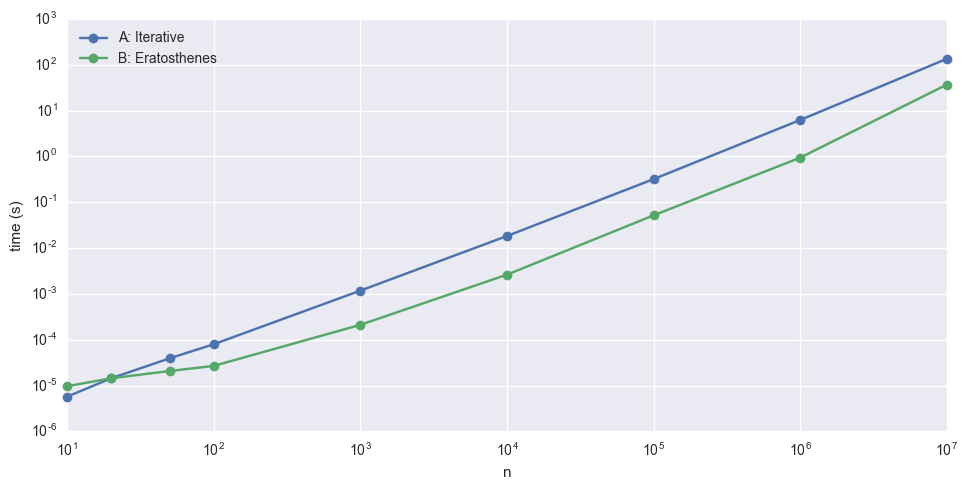

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.loglog(N, sol_times_a, label='A: Iterative', marker='o', clip_on=False)
plt.loglog(N, sol_times_b, label='B: Eratosthenes', marker='o', clip_on=False)
plt.legend(loc=0)
plt.xlabel('n')
plt.ylabel('time (s)');

In figure 1 we compare the best-of-three timings on my laptop of the two methods over a range of $n$ values. We see that the iterative search is quicker for $n = 10$, but for $n = 20$ and beyond, the Eratosthenes method is quicker. Over this range, both are polynomial below quadratic.

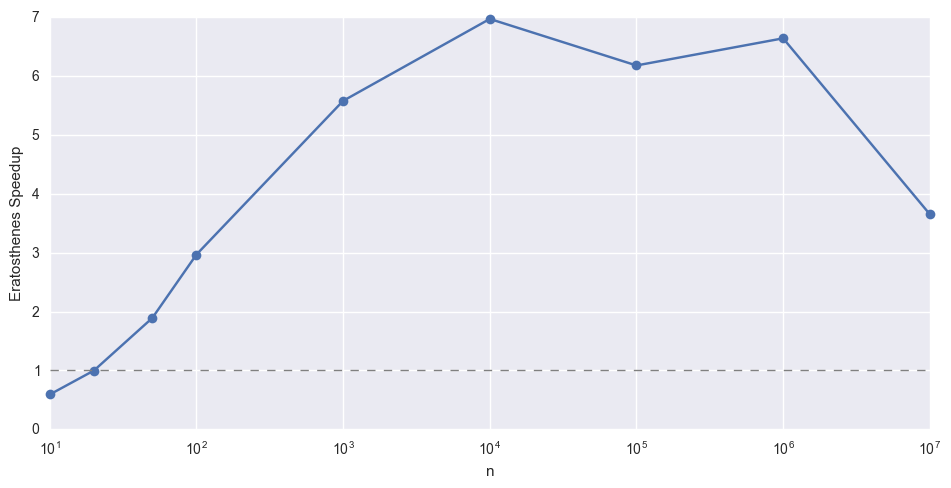

In [18]:
speedup = [sol_times_a[i]/sol_times_b[i] for i, x in enumerate(sol_times_b)]

plt.figure(figsize=(10, 5))
plt.semilogx(N, speedup, marker='o', clip_on=False)
plt.axhline(1, c='grey', ls='--', lw=1)
plt.xlabel('n')
plt.ylabel('Eratosthenes Speedup');

In figure 2 we show the speedup of the Eratosthenes method over the iterative search. The speedup peaks at about 7$\times$ faster at $n = 10^4$. Beyond this Eratosthenes method is still significantly faster, but the speedup is coming down. This is likely due to the fact that the Sieve of Eratosthenes for high $n$ becomes memory intensive, as we need to store all of the numbers up to $n$, whereas with the more computationally intensive iterative search, we only need to store the primes we've already calculated.

The runtimes at $n = 10^7$ are in the order of minutes and already long enough that we'd want to look at further tuning of the algorithm beyond this.